<h3>Unziping of data</h3>

In [ ]:
! wget wget --header="Host: doc-0o-0g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/u/0/uc?export=download&confirm=Gw5z&id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu" --header="Cookie: AUTH_3uj3lr63926mpo58f9067bc27qffjbun_nonce=eraqrv6p9nhhk" --header="Connection: keep-alive" "https://doc-0o-0g-docs.googleusercontent.com/docs/securesc/mbqkuj3ga7esu2mcp298ohl7rel78uat/tn98k12c07k1baqmoqsbo4orhhr3rae0/1592665350000/00484516897554883881/14108423195757150601/1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu?e=download&authuser=0&nonce=eraqrv6p9nhhk&user=14108423195757150601&hash=1u19neu20kvtf80ojl15a0e7erq772er" -c -O 'rvl-cdip.rar'

--2020-06-20 15:04:01--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-06-20 15:04:01--  https://doc-0o-0g-docs.googleusercontent.com/docs/securesc/mbqkuj3ga7esu2mcp298ohl7rel78uat/tn98k12c07k1baqmoqsbo4orhhr3rae0/1592665350000/00484516897554883881/14108423195757150601/1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu?e=download&authuser=0&nonce=eraqrv6p9nhhk&user=14108423195757150601&hash=1u19neu20kvtf80ojl15a0e7erq772er
Resolving doc-0o-0g-docs.googleusercontent.com (doc-0o-0g-docs.googleusercontent.com)... 64.233.166.132, 2a00:1450:400c:c09::84
Connecting to doc-0o-0g-docs.googleusercontent.com (doc-0o-0g-docs.googleusercontent.com)|64.233.166.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/rar]
Saving to: ‘rvl-cdip.rar’

rvl-cdip.rar            [     <=>            ]   4.34G  64.9MB/s    in 83s     

2020-06-20 15:05:25 (53.3 MB/s) - ‘rvl-cdip.rar’ saved [4660541790]

In [ ]:
!unrar x rvl-cdip.rar

Streaming output truncated to the last 5000 lines.
Creating    data_final/imagesy/y/w/v/ywv07e00                         OK
Extracting  data_final/imagesy/y/w/v/ywv07e00/2031300697.tif              95%  OK 
Creating    data_final/imagesy/y/w/v/ywv14c00                         OK
Extracting  data_final/imagesy/y/w/v/ywv14c00/2080388930b.tif             95%  OK 
Creating    data_final/imagesy/y/w/v/ywv15a00                         OK
Extracting  data_final/imagesy/y/w/v/ywv15a00/528410291+-0291.tif         95%  OK 
Creating    data_final/imagesy/y/w/v/ywv90a00                         OK
Extracting  data_final/imagesy/y/w/v/ywv90a00/0060014591.tif              95%  OK 
Creating    data_final/imagesy/y/w/v/ywv90c00                         OK
Extracting  data_final/imagesy/y/w/v/ywv90c00/13527205.tif                95%  OK 
Creating    data_final/imagesy/y/w/v/ywv96c00                         OK
Extracting  data_final/imagesy/y/w/v/ywv96c00/CTRCO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
#print(tf._version_)
import os
import numpy as np
import pandas as pd
import cv2
import random as rn

Loading data into dataframe

In [ ]:
dir_path = "data_final"
labels = pd.read_csv("/content/drive/My Drive/19_Trasfer Learning/data/data/labels_final.csv",dtype=str)
print(labels.shape)
labels.head()

(48000, 2)


,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [ ]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for i in labels['path']:
  img = cv2.imread(os.path.join(dir_path,i), cv2.IMREAD_UNCHANGED)
  # get dimensions of image
  shape = img.shape
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1])

In [ ]:
print("Median of Image Heights is {}".format(np.median(list_of_heights)))
print("Mean of Image Heights is {}".format(np.mean(list_of_heights)))

Median of Image Heights is 1000.0
Mean of Image Heights is 1000.0


In [ ]:
print("Median of Image Widths is {}".format(np.median(list_of_widths)))
print("Mean of Image Widths is {}".format(np.mean(list_of_widths)))

Median of Image Widths is 762.0
Mean of Image Widths is 766.3872083333333


Spliting Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(labels, test_size = 0.25)

Using ImageDataGenerator to generate batches of tensor image data 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()
train_generator=datagen.flow_from_dataframe(
dataframe = train,
directory = dir_path,
x_col = "path",
y_col = "label",
batch_size = 64,
shuffle = True,
class_mode = "categorical",
target_size = (500,300))


test_generator=datagen.flow_from_dataframe(
dataframe = test,
directory = dir_path,
x_col = "path",
y_col = "label",
batch_size = 64,
shuffle = True,
class_mode = "categorical",
target_size = (500,300))

Found 36000 validated image filenames belonging to 16 classes.
Found 12000 validated image filenames belonging to 16 classes.


In [ ]:
%load_ext tensorboard
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import he_normal
import datetime

### Model-1

VGG16 Model

In [ ]:
tf.keras.backend.clear_session()
# loading model and specifying new input shape for images
base_1 = VGG16(weights='imagenet',include_top=False) # not training layers
base_1.trainable = False
base_1.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and a output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 500, 300, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 11, 5, 512)        6554112   
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 5, 2, 512)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               1310976   
_________________________________________________________________
FC2 (Dense)                  (None, 128)               32896 

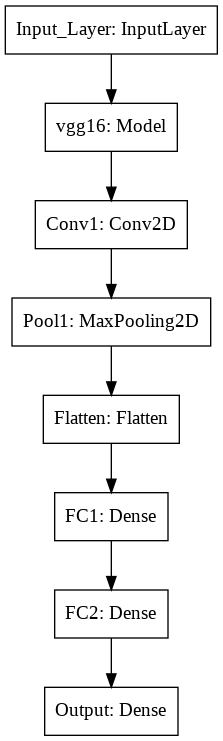

In [ ]:
#Input layer
input_layer = Input(shape=(500,300,3),name='Input_Layer')
base_11 = base_1(input_layer)
#Conv Layer
Conv1 =Conv2D(filters=512,kernel_size=(5,5),strides=(1,1),padding='valid',data_format='channels_last',activation='relu',kernel_initializer=he_normal(seed=0),name='Conv1')(base_11)
#MaxPool Layer
Pool1 =MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',name='Pool1')(Conv1)

flatten = Flatten(data_format='channels_last',name='Flatten')(Pool1)
#FC1 layer
FC1 =Dense(units=256,activation='relu',kernel_initializer=he_normal(seed=32),name='FC1')(flatten)
#FC2 layer
FC2 = Dense(units=128,activation='relu',kernel_initializer=he_normal(seed=33),name='FC2')(FC1)
#output layer
Output =Dense(units=16,activation='softmax',kernel_initializer=he_normal(seed=3),name='Output')(FC2)
#Creating a model
model1 = Model(inputs=input_layer,outputs=Output)
model1.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.001), metrics=['accuracy'])
model1.summary() 
plot_model(model1, to_file='model1.png', show_shapes=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
import datetime
log_dir = "../content/drive/My Drive/logs/model_111/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_1 = TensorBoard(log_dir=log_dir, histogram_freq=1)
early = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=1)
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = test_generator.n//test_generator.batch_size
model1.fit(train_generator,
steps_per_epoch = STEP_SIZE_TRAIN,
validation_data = test_generator,
validation_steps = STEP_SIZE_VALID,
epochs = 10,
callbacks = [tensorboard_1,early]
)

Epoch 1/10
562/562 [==============================] - 1626s 3s/step - loss: 2.0708 - accuracy: 0.5876 - val_loss: 1.1825 - val_accuracy: 0.6594
Epoch 2/10
562/562 [==============================] - 1615s 3s/step - loss: 0.9505 - accuracy: 0.7191 - val_loss: 1.0674 - val_accuracy: 0.7007
Epoch 3/10
562/562 [==============================] - 1614s 3s/step - loss: 0.7504 - accuracy: 0.7765 - val_loss: 1.1109 - val_accuracy: 0.6952


OBSERVATION-
Before early stopiing-
In this model we are using vgg-16 as feature generator and we are passing it to dense layer.The train accuracy was 81 percent and test accuracy was 70 percent.
we can reduce this gap by using regularizers during trainig.
we can see that it took very less time and accuracy is better. so we should go for pre trained model if we have similar dataset.
after early stopping-
the overfitting is reduced and training accuracy is 75 percent and test accuracy is 70 percent.

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer. any FC layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>
3. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [ ]:
tf.keras.backend.clear_session()
base2 = VGG16(weights='imagenet',include_top=False)
base2.trainable = False

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 500, 300, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 15, 9, 512)        6554112   
_________________________________________________________________
Conv2 (Conv2D)               (None, 15, 9, 128)        65664     
_________________________________________________________________
Flatten (Flatten)            (None, 17280)             0         
_________________________________________________________________
dropout (Dropout)            (None, 17280)             0         
_________________________________________________________________
Output (Dense)               (None, 16)                276496

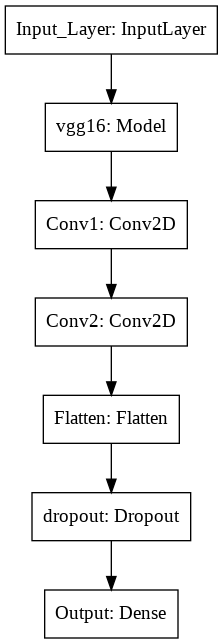

In [ ]:
input_layer = Input(shape=(500,300,3),name='Input_Layer')
base22 = base2(input_layer)
#Conv1 Layer
Conv1 =Conv2D(filters=512,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',activation='relu',kernel_initializer=he_normal(seed=0),name='Conv1')(base22)
#Conv2 Layer
Conv2 = Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu',kernel_initializer=he_normal(seed=3),name='Conv2')(Conv1)
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Conv2)
#dropout
drop= Dropout(0.4)(flatten)
#output layer
Output =Dense(units=16,activation='softmax',kernel_initializer=he_normal(seed=5),name='Output')(drop)
#Creating a model
model2 = Model(inputs=input_layer,outputs=Output)
model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.001), metrics=['accuracy'])
model2.summary()
plot_model(model2, to_file='model2.png', show_shapes=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
log_dir = "../content/drive/My Drive/logs/model_22/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_1 = TensorBoard(log_dir=log_dir, histogram_freq=1)
early = EarlyStopping(monitor='val_accuracy', patience=2,min_delta=1)
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = test_generator.n//test_generator.batch_size
model2.fit(train_generator,
steps_per_epoch = STEP_SIZE_TRAIN,
validation_data = test_generator,
validation_steps = STEP_SIZE_VALID,
epochs = 10,
callbacks = [tensorboard_1,early]
)

Epoch 1/10
562/562 [==============================] - 1621s 3s/step - loss: 1.8674 - accuracy: 0.4887 - val_loss: 1.3439 - val_accuracy: 0.5979
Epoch 2/10
562/562 [==============================] - 1621s 3s/step - loss: 1.3149 - accuracy: 0.6092 - val_loss: 1.2738 - val_accuracy: 0.6286
Epoch 3/10
562/562 [==============================] - 1621s 3s/step - loss: 1.1126 - accuracy: 0.6657 - val_loss: 1.1642 - val_accuracy: 0.6615


Here we are using VGG16 as feature generator and instead of using dense layer we are using Convolution layer.The training accuracy is 78 percent and testing accuracy is 68 percent. We can see that the previous model performed better than this model.With more tuning like learning rate or optimizers we can get 70%+
Validation accuracy with this model. we can also regulate the model by using regulrization.
To avoid overfitting we used dropouts and now the train accuracy and test accuracy is 68 percent now.

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [ ]:
tf.keras.backend.clear_session()
base3 = VGG16(weights='imagenet',include_top=False)
for layer in base3.layers[:-6]: # training last six layers
  layer.trainable = False
base3.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
from tensorflow.keras.layers import Dropout

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 500, 300, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
Conv1 (Conv2D)               (None, 15, 9, 512)        6554112   
_________________________________________________________________
Conv2 (Conv2D)               (None, 15, 9, 128)        65664     
_________________________________________________________________
Flatten (Flatten)            (None, 17280)             0         
_________________________________________________________________
dropout (Dropout)            (None, 17280)             0         
_________________________________________________________________
Output (Dense)               (None, 16)                276496

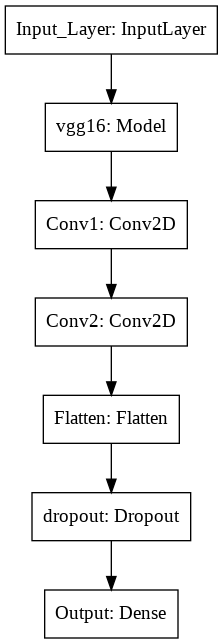

In [ ]:
input_layer = Input(shape=(500,300,3),name='Input_Layer')
base33 = base3(input_layer)
#Conv1 Layer
Conv1 =Conv2D(filters=512,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',activation='relu',kernel_initializer=he_normal(seed=0),name='Conv1')(base33)
#Conv2 Layer
Conv2 = Conv2D(filters=128,kernel_size=(1,1),strides=(1,1),padding='same',activation='relu',kernel_initializer=he_normal(seed=3),name='Conv2')(Conv1)
#Flatten
flatten = Flatten(data_format='channels_last',name='Flatten')(Conv2)
#dropout
drop= Dropout(0.4)(flatten)
#output layer
Output =Dense(units=16,activation='softmax',kernel_initializer=he_normal(seed=5),name='Output')(drop)
#Creating a model
model3 = Model(inputs=input_layer,outputs=Output)
model3.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate= 0.0001), metrics=['accuracy'])
model3.summary()
plot_model(model3, to_file='model3.png', show_shapes=False, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
log_dir = "../content/drive/My Drive/logs/model_33/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_1 = TensorBoard(log_dir=log_dir, histogram_freq=1)
early = EarlyStopping(monitor='val_loss', patience=2)
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = test_generator.n//test_generator.batch_size
model3.fit(train_generator,
steps_per_epoch = STEP_SIZE_TRAIN,
validation_data = test_generator,
validation_steps = STEP_SIZE_VALID,
epochs = 10,
callbacks = [tensorboard_1,early]
)

Epoch 1/10
562/562 [==============================] - 1831s 3s/step - loss: 1.8178 - accuracy: 0.4441 - val_loss: 1.2473 - val_accuracy: 0.6121
Epoch 2/10
562/562 [==============================] - 1830s 3s/step - loss: 1.0921 - accuracy: 0.6664 - val_loss: 0.9521 - val_accuracy: 0.7124
Epoch 3/10
562/562 [==============================] - 1830s 3s/step - loss: 0.8232 - accuracy: 0.7486 - val_loss: 0.8178 - val_accuracy: 0.7577
Epoch 4/10
562/562 [==============================] - 1830s 3s/step - loss: 0.6461 - accuracy: 0.8012 - val_loss: 0.7961 - val_accuracy: 0.7641
Epoch 5/10
562/562 [==============================] - 1830s 3s/step - loss: 0.5029 - accuracy: 0.8436 - val_loss: 0.7425 - val_accuracy: 0.7886
Epoch 6/10
562/562 [==============================] - 1829s 3s/step - loss: 0.3868 - accuracy: 0.8776 - val_loss: 0.7767 - val_accuracy: 0.7924
Epoch 7/10
562/562 [==============================] - 1829s 3s/step - loss: 0.3004 - accuracy: 0.9035 - val_loss: 0.8298 - val_accuracy:

In this model we are training the last 6 layers of vgg-16. 
with the training rate of 0.001 the model performence was bad so I changed the learning rate to  0.0001 and it worked with training accuracy of 90% and validation accuracy of 78 percent
we can see that the difference is very large we can reduce this gap by using early stopping with min_delta attribute to stop training if the test accuracy is not increasing more than 1 percet in each epoch.

After adding dropout the model is not overfitting. It has training accuracy of 82 percent and test accuracy of 79 percent